In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [274]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [275]:
forex_data = pd.read_excel("EUR_IDR_Investing.xlsx")

In [276]:
forex_data.head()

,EUR_IDR Historical Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Date,Price,Open,High,Low,Vol.,Change %
1,01/01/2020,"15,559.5","15,565.8","15,580.3","15,555.3",0.78K,0.00%
2,01/02/2020,"15,511.2","15,565.1","15,605.7","15,504.3",43.96K,-0.31%
3,01/03/2020,"15,536.1","15,516.8","15,569.6","15,490.9",56.72K,0.16%
4,01/06/2020,"15,603.0","15,551.4","15,622.6","15,533.3",59.02K,0.43%


In [277]:
forex_data.tail()

,EUR_IDR Historical Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1409,05/26/2025,"18,494.1","18,432.0","18,526.5","18,422.3",NaN,0.34%
1410,05/27/2025,"18,435.1","18,494.1","18,532.7","18,424.5",NaN,-0.32%
1411,05/28/2025,"18,396.3","18,434.3","18,475.3","18,379.2",NaN,-0.21%
1412,05/29/2025,"18,525.0","18,401.2","18,546.2","18,261.1",NaN,0.70%
1413,05/30/2025,"18,485.9","18,514.4","18,555.1","18,428.1",NaN,-0.21%


In [278]:
forex_data.drop(0, axis=0)

,EUR_IDR Historical Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,01/01/2020,"15,559.5","15,565.8","15,580.3","15,555.3",0.78K,0.00%
2,01/02/2020,"15,511.2","15,565.1","15,605.7","15,504.3",43.96K,-0.31%
3,01/03/2020,"15,536.1","15,516.8","15,569.6","15,490.9",56.72K,0.16%
4,01/06/2020,"15,603.0","15,551.4","15,622.6","15,533.3",59.02K,0.43%
5,01/07/2020,"15,467.8","15,605.8","15,610.0","15,446.3",70.15K,-0.87%
...,...,...,...,...,...,...,...
1409,05/26/2025,"18,494.1","18,432.0","18,526.5","18,422.3",NaN,0.34%
1410,05/27/2025,"18,435.1","18,494.1","18,532.7","18,424.5",NaN,-0.32%
1411,05/28/2025,"18,396.3","18,434.3","18,475.3","18,379.2",NaN,-0.21%
1412,05/29/2025,"18,525.0","18,401.2","18,546.2","18,261.1",NaN,0.70%


In [279]:
forex_data.columns

Index(['EUR_IDR Historical Data', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [280]:
forex_data = forex_data.rename(columns={'EUR_IDR Historical Data':'Date'})
forex_data = forex_data.rename(columns={'Unnamed: 1':'Close Price'})
forex_data = forex_data.rename(columns={'Unnamed: 2':'Open'})
forex_data = forex_data.rename(columns={'Unnamed: 3':'High'})
forex_data = forex_data.rename(columns={'Unnamed: 4':'Low'})
forex_data = forex_data.rename(columns={'Unnamed: 5':'Vol.'})
forex_data = forex_data.rename(columns={'Unnamed: 6':'Change %'})

In [281]:
forex_data

,Date,Close Price,Open,High,Low,Vol.,Change %
0,Date,Price,Open,High,Low,Vol.,Change %
1,01/01/2020,"15,559.5","15,565.8","15,580.3","15,555.3",0.78K,0.00%
2,01/02/2020,"15,511.2","15,565.1","15,605.7","15,504.3",43.96K,-0.31%
3,01/03/2020,"15,536.1","15,516.8","15,569.6","15,490.9",56.72K,0.16%
4,01/06/2020,"15,603.0","15,551.4","15,622.6","15,533.3",59.02K,0.43%
...,...,...,...,...,...,...,...
1409,05/26/2025,"18,494.1","18,432.0","18,526.5","18,422.3",NaN,0.34%
1410,05/27/2025,"18,435.1","18,494.1","18,532.7","18,424.5",NaN,-0.32%
1411,05/28/2025,"18,396.3","18,434.3","18,475.3","18,379.2",NaN,-0.21%
1412,05/29/2025,"18,525.0","18,401.2","18,546.2","18,261.1",NaN,0.70%


In [282]:
forex_data = forex_data.drop(0, axis=0)

In [283]:
forex_data = forex_data.drop(['Open', 'High', 'Low','Vol.', 'Change %'], axis=1)

In [284]:
forex_data

,Date,Close Price
1,01/01/2020,"15,559.5"
2,01/02/2020,"15,511.2"
3,01/03/2020,"15,536.1"
4,01/06/2020,"15,603.0"
5,01/07/2020,"15,467.8"
...,...,...
1409,05/26/2025,"18,494.1"
1410,05/27/2025,"18,435.1"
1411,05/28/2025,"18,396.3"
1412,05/29/2025,"18,525.0"


In [285]:
forex_data.index = forex_data['Date']

In [286]:
forex_data

,Date,Close Price
Date,,
01/01/2020,01/01/2020,"15,559.5"
01/02/2020,01/02/2020,"15,511.2"
01/03/2020,01/03/2020,"15,536.1"
01/06/2020,01/06/2020,"15,603.0"
01/07/2020,01/07/2020,"15,467.8"
...,...,...
05/26/2025,05/26/2025,"18,494.1"
05/27/2025,05/27/2025,"18,435.1"
05/28/2025,05/28/2025,"18,396.3"


In [287]:
forex_data = forex_data.drop(['Date'], axis=1)

In [288]:
forex_data

,Close Price
Date,
01/01/2020,"15,559.5"
01/02/2020,"15,511.2"
01/03/2020,"15,536.1"
01/06/2020,"15,603.0"
01/07/2020,"15,467.8"
...,...
05/26/2025,"18,494.1"
05/27/2025,"18,435.1"
05/28/2025,"18,396.3"


In [289]:
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413 entries, 01/01/2020 to 05/30/2025
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Close Price  1413 non-null   object
dtypes: object(1)
memory usage: 22.1+ KB


In [290]:
forex_data.tail()

,Close Price
Date,
05/26/2025,"18,494.1"
05/27/2025,"18,435.1"
05/28/2025,"18,396.3"
05/29/2025,"18,525.0"
05/30/2025,"18,485.9"


### DATA INFLASI

In [295]:
month_map = {
    'Januari': 'January', 'Februari': 'February', 'Maret': 'March',
    'April': 'April', 'Mei': 'May', 'Juni': 'June',
    'Juli': 'July', 'Agustus': 'August', 'September': 'September',
    'Oktober': 'October', 'November': 'November', 'Desember': 'December'
}

inflasi = pd.read_excel('Data Inflasi.xlsx')
inflasi = inflasi.iloc[4:]
inflasi = inflasi.drop(columns=['Unnamed: 0', 'Unnamed: 3'])
inflasi = inflasi.rename(columns={
    'Unnamed: 1': 'Date',
    'Unnamed: 2': 'Inflasi'
})

inflasi['Inflasi'] = inflasi['Inflasi'].str.replace('%', '').astype(float)
inflasi['Date'] = inflasi['Date'].astype(str)
inflasi['Date'] = inflasi['Date'].replace(month_map, regex=True)
inflasi['Date'] = pd.to_datetime(inflasi['Date'], format="%B %Y", errors='coerce')
inflasi.dropna(subset=['Date'], inplace=True)
inflasi.set_index('Date', inplace=True)
inflasi = inflasi.sort_index()

df_data = inflasi
df_inflasi = df_data
df_inflasi

,Inflasi
Date,
2020-01-01,2.68
2020-02-01,2.98
2020-03-01,2.96
2020-04-01,2.67
2020-05-01,2.19
...,...
2025-01-01,0.76
2025-02-01,-0.09
2025-03-01,1.03


### BI RATE (manual)

In [296]:
int_rate = pd.read_excel("BI-7Day-RR.xlsx", header=4)

In [297]:
int_rate.head()

,NO,Tanggal,BI-7Day-RR,Unnamed: 3
0,1,18 Juni 2025,5.50 %,NaN
1,2,21 Mei 2025,5.50 %,NaN
2,3,23 April 2025,5.75 %,NaN
3,4,19 Maret 2025,5.75 %,NaN
4,5,19 Februari 2025,5.75 %,NaN


In [298]:
int_rate = int_rate.drop(['NO','Unnamed: 3'],axis=1)

In [299]:
int_rate.head()

,Tanggal,BI-7Day-RR
0,18 Juni 2025,5.50 %
1,21 Mei 2025,5.50 %
2,23 April 2025,5.75 %
3,19 Maret 2025,5.75 %
4,19 Februari 2025,5.75 %


In [300]:
bulan_mapping = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

for indo, eng in bulan_mapping.items():
    int_rate['Tanggal'] = int_rate['Tanggal'].str.replace(indo, eng)

In [301]:
int_rate.rename(
    columns={
        "Tanggal": "Date",
        "BI-7Day-RR": "BI Rate",
    },
    inplace=True
)

In [302]:
int_rate['Date'] = pd.to_datetime(int_rate['Date'])

In [303]:
int_rate.head()

,Date,BI Rate
0,2025-06-18,5.50 %
1,2025-05-21,5.50 %
2,2025-04-23,5.75 %
3,2025-03-19,5.75 %
4,2025-02-19,5.75 %


In [304]:
int_rate['BI Rate'] = int_rate['BI Rate'].str.replace('%', '').astype(float)

In [305]:
int_rate = int_rate.set_index('Date')

In [306]:
int_rate.head()

,BI Rate
Date,
2025-06-18,5.50
2025-05-21,5.50
2025-04-23,5.75
2025-03-19,5.75
2025-02-19,5.75


In [307]:
int_rate = int_rate.sort_index(ascending=True)

In [308]:
int_rate.head()

,BI Rate
Date,
2016-04-21,5.50
2016-05-19,5.50
2016-06-16,5.25
2016-07-21,5.25
2016-08-19,5.25


In [309]:
int_rate = int_rate.loc['2020-01-01':'2025-05-30']

In [310]:
int_rate.head()

,BI Rate
Date,
2020-01-23,5.00
2020-02-20,4.75
2020-03-19,4.50
2020-04-14,4.50
2020-05-19,4.50


In [311]:
int_rate.tail()

,BI Rate
Date,
2025-01-15,5.75
2025-02-19,5.75
2025-03-19,5.75
2025-04-23,5.75
2025-05-21,5.50


In [312]:
# jadiin awal bulan 
int_rate.index = int_rate.index.to_period('M').to_timestamp()
int_rate.head()

,BI Rate
Date,
2020-01-01,5.00
2020-02-01,4.75
2020-03-01,4.50
2020-04-01,4.50
2020-05-01,4.50


In [313]:
int_rate

,BI Rate
Date,
2020-01-01,5.00
2020-02-01,4.75
2020-03-01,4.50
2020-04-01,4.50
2020-05-01,4.50
...,...
2025-01-01,5.75
2025-02-01,5.75
2025-03-01,5.75


### cadangan devisa

In [314]:
cad_devisa = pd.read_excel("Cadangan Devisa-BI.xlsx")
cad_devisa = cad_devisa.set_index(cad_devisa['Tanggal'])
cad_devisa = cad_devisa.drop('Tanggal', axis=1)
cad_devisa.index = cad_devisa.index.to_period('M').to_timestamp()
cad_devisa = cad_devisa.rename(columns={'Cadangan Devisa (konsep IRFCL) 4) dalam USD':'Cadangan Devisa'})
cad_devisa.head()

,Cadangan Devisa
Tanggal,
2020-01-01,131704000000
2020-02-01,130444000000
2020-03-01,120969000000
2020-04-01,127880000000
2020-05-01,130544000000


### FORWARD FILL for exogeneous var

In [315]:
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413 entries, 01/01/2020 to 05/30/2025
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Close Price  1413 non-null   object
dtypes: object(1)
memory usage: 22.1+ KB


In [316]:
df_inflasi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2020-01-01 to 2025-05-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Inflasi  65 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


In [317]:
int_rate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65 entries, 2020-01-01 to 2025-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BI Rate  65 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


In [318]:
inflation_daily = df_inflasi.reindex(forex_data.index, method='ffill')

In [319]:
inflation_daily

,Inflasi
Date,
01/01/2020,2.68
01/02/2020,2.68
01/03/2020,2.68
01/06/2020,2.68
01/07/2020,2.68
...,...
05/26/2025,1.60
05/27/2025,1.60
05/28/2025,1.60


In [320]:
interest_daily = int_rate.reindex(forex_data.index, method='ffill')

In [321]:
interest_daily

,BI Rate
Date,
01/01/2020,5.0
01/02/2020,5.0
01/03/2020,5.0
01/06/2020,5.0
01/07/2020,5.0
...,...
05/26/2025,5.5
05/27/2025,5.5
05/28/2025,5.5


In [322]:
devisa_daily = cad_devisa.reindex(forex_data.index, method='ffill')
devisa_daily

,Cadangan Devisa
Date,
01/01/2020,131704000000
01/02/2020,131704000000
01/03/2020,131704000000
01/06/2020,131704000000
01/07/2020,131704000000
...,...
05/26/2025,152488000000
05/27/2025,152488000000
05/28/2025,152488000000


In [323]:
df_exo = pd.merge(inflation_daily, interest_daily, left_index=True, right_index=True, how='inner')
df_exo = pd.merge(df_exo, devisa_daily, left_index=True, right_index=True, how='inner')

In [324]:
df_exo

,Inflasi,BI Rate,Cadangan Devisa
Date,,,
01/01/2020,2.68,5.0,131704000000
01/02/2020,2.68,5.0,131704000000
01/03/2020,2.68,5.0,131704000000
01/06/2020,2.68,5.0,131704000000
01/07/2020,2.68,5.0,131704000000
...,...,...,...
05/26/2025,1.60,5.5,152488000000
05/27/2025,1.60,5.5,152488000000
05/28/2025,1.60,5.5,152488000000


In [325]:
df_exo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413 entries, 01/01/2020 to 05/30/2025
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Inflasi          1413 non-null   float64
 1   BI Rate          1413 non-null   float64
 2   Cadangan Devisa  1413 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 76.4+ KB


In [326]:
df_all = pd.merge(forex_data, df_exo, left_index=True, right_index=True, how='inner')

In [327]:
df_all

,Close Price,Inflasi,BI Rate,Cadangan Devisa
Date,,,,
01/01/2020,"15,559.5",2.68,5.0,131704000000
01/02/2020,"15,511.2",2.68,5.0,131704000000
01/03/2020,"15,536.1",2.68,5.0,131704000000
01/06/2020,"15,603.0",2.68,5.0,131704000000
01/07/2020,"15,467.8",2.68,5.0,131704000000
...,...,...,...,...
05/26/2025,"18,494.1",1.60,5.5,152488000000
05/27/2025,"18,435.1",1.60,5.5,152488000000
05/28/2025,"18,396.3",1.60,5.5,152488000000


In [328]:
df_all['Close Price'] = df_all['Close Price'].round(2)

In [329]:
print(type(df_all))

<class 'pandas.core.frame.DataFrame'>


In [330]:
df_all

,Close Price,Inflasi,BI Rate,Cadangan Devisa
Date,,,,
01/01/2020,"15,559.5",2.68,5.0,131704000000
01/02/2020,"15,511.2",2.68,5.0,131704000000
01/03/2020,"15,536.1",2.68,5.0,131704000000
01/06/2020,"15,603.0",2.68,5.0,131704000000
01/07/2020,"15,467.8",2.68,5.0,131704000000
...,...,...,...,...
05/26/2025,"18,494.1",1.60,5.5,152488000000
05/27/2025,"18,435.1",1.60,5.5,152488000000
05/28/2025,"18,396.3",1.60,5.5,152488000000


In [331]:
df_all['Close Price'] = (
    df_all['Close Price']
    .str.replace(',', '', regex=False)
    .astype(float))

In [332]:
df_all

,Close Price,Inflasi,BI Rate,Cadangan Devisa
Date,,,,
01/01/2020,15559.5,2.68,5.0,131704000000
01/02/2020,15511.2,2.68,5.0,131704000000
01/03/2020,15536.1,2.68,5.0,131704000000
01/06/2020,15603.0,2.68,5.0,131704000000
01/07/2020,15467.8,2.68,5.0,131704000000
...,...,...,...,...
05/26/2025,18494.1,1.60,5.5,152488000000
05/27/2025,18435.1,1.60,5.5,152488000000
05/28/2025,18396.3,1.60,5.5,152488000000


In [333]:
df_all.index = pd.to_datetime(df_all.index, errors='coerce')

In [334]:
df_all.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2025-05-19', '2025-05-20', '2025-05-21', '2025-05-22',
               '2025-05-23', '2025-05-26', '2025-05-27', '2025-05-28',
               '2025-05-29', '2025-05-30'],
              dtype='datetime64[ns]', name='Date', length=1413, freq=None)

In [335]:
# GANTI VALUE ANOMALI
''' 
df_all.loc['2020-03-06', 'Close Price'] = 16047.30
df_all.loc['2021-03-12', 'Close Price'] = 17187.00
df_all.loc['2021-01-20', 'Close Price'] = 16969.80
df_all.loc['2021-12-02', 'Close Price'] = 16242.30
df_all.loc['2021-12-03', 'Close Price'] = 16285.10
df_all.loc['2022-08-19', 'Close Price'] = 14885.40
df_all.loc['2022-10-21', 'Close Price'] = 15411.20
'''

" \ndf_all.loc['2020-03-06', 'Close Price'] = 16047.30\ndf_all.loc['2021-03-12', 'Close Price'] = 17187.00\ndf_all.loc['2021-01-20', 'Close Price'] = 16969.80\ndf_all.loc['2021-12-02', 'Close Price'] = 16242.30\ndf_all.loc['2021-12-03', 'Close Price'] = 16285.10\ndf_all.loc['2022-08-19', 'Close Price'] = 14885.40\ndf_all.loc['2022-10-21', 'Close Price'] = 15411.20\n"

### EDA

Text(2022-09-27 00:00:00, 14403.1, 'Min: 14503.10')

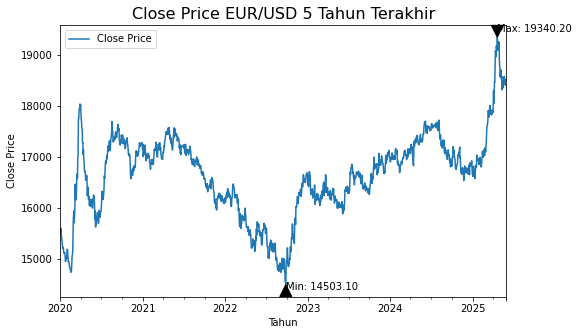

In [336]:
df_close = pd.DataFrame(df_all['Close Price'])

df_close.plot(figsize=(8,5))
plt.title('Close Price EUR/USD 5 Tahun Terakhir',fontsize=16)
plt.xlabel('Tahun')
plt.ylabel('Close Price')

max_kurs = df_close.loc[df_close['Close Price'].idxmax()]
min_kurs = df_close.loc[df_close['Close Price'].idxmin()]
plt.annotate(f'Max: {max_kurs.values[0]:.2f}',
             xy=(max_kurs.name, max_kurs.values[0]),
             xytext=(max_kurs.name, max_kurs.values[0] + 100),
             arrowprops=dict(facecolor='black', shrink=0.02))

plt.annotate(f'Min: {min_kurs.values[0]:.2f}',
             xy=(min_kurs.name, min_kurs.values[0]),
             xytext=(min_kurs.name, min_kurs.values[0] - 100),
             arrowprops=dict(facecolor='black', shrink=0.05))

In [337]:
import plotly.express as px

df_close = pd.DataFrame(df_all['Close Price']).copy()
df_close = df_close.reset_index()  
df_close.rename(columns={"index": "Date"}, inplace=True)

fig = px.line(
    df_close,
    x="Date",
    y="Close Price",
    title="Close Price EUR/IDR 5 Tahun Terakhir",
    labels={"Close Price": "Close Price", "Date": "Tahun"},
    template="plotly_white"
)
fig.update_traces(line=dict(color="blue", width=2))
fig.update_layout(
    title=dict(x=0.5, font=dict(size=20)),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    hovermode="x unified"
)

fig.show()

In [338]:
# ganti value anomali 
"""
df_all.loc['2020-03-06', 'Close Price'] = 16047.30
df_all.loc['2021-03-12', 'Close Price'] = 17187.00
df_all.loc['2021-01-20', 'Close Price'] = 16969.80
df_all.loc['2021-12-02', 'Close Price'] = 16242.30
df_all.loc['2021-12-03', 'Close Price'] = 16285.10
df_all.loc['2022-08-19', 'Close Price'] = 14885.40
df_all.loc['2022-10-21', 'Close Price'] = 15411.20
"""

"\ndf_all.loc['2020-03-06', 'Close Price'] = 16047.30\ndf_all.loc['2021-03-12', 'Close Price'] = 17187.00\ndf_all.loc['2021-01-20', 'Close Price'] = 16969.80\ndf_all.loc['2021-12-02', 'Close Price'] = 16242.30\ndf_all.loc['2021-12-03', 'Close Price'] = 16285.10\ndf_all.loc['2022-08-19', 'Close Price'] = 14885.40\ndf_all.loc['2022-10-21', 'Close Price'] = 15411.20\n"

In [339]:
df_close.median()

Date           2022-09-15 00:00:00
Close Price                16745.0
dtype: object

### UJI STASIONERITAS

In [340]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_all['Close Price'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -2.0979217943717408
p-value: 0.24535107917547666


p-value !< 0.05 sehingga tidak stasioner. perlu differencing pada data Close Price

In [341]:
df_all['Close Price_diff'] = df_all['Close Price'].diff()


In [342]:
result = adfuller(df_all['Close Price_diff'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -14.999173476408426
p-value: 1.096267698131439e-27


sudah stasioner

In [343]:
df_diff = pd.DataFrame(df_all['Close Price_diff']).copy()
df_diff = df_diff.reset_index()  
df_diff.rename(columns={"index": "Date"}, inplace=True)

fig = px.line(
    df_diff,
    x="Date",
    y="Close Price_diff",
    title="Differenced Close Price EUR/IDR",
    labels={"Close Price_diff": "Differenced Close Price EUR/IDR", "Date": "Tahun"},
    template="plotly_white"
)
fig.update_traces(line=dict(color="blue", width=2))
fig.update_layout(
    title=dict(x=0.5, font=dict(size=20)),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    hovermode="x unified"
)

fig.show()

In [344]:
# uji pada exog var
result = adfuller(df_all['Inflasi'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.1410155936044677
p-value: 0.6984414182729469


stasioner

In [345]:
result = adfuller(df_all['BI Rate'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.076369828490772
p-value: 0.7244027749640407


tidak stasioner

In [346]:
df_all['BI Rate_diff'] = df_all['BI Rate'].diff()

In [347]:
result = adfuller(df_all['BI Rate_diff'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -4.188020769589438
p-value: 0.0006903497219719902


In [348]:
df_diff = pd.DataFrame(df_all['BI Rate_diff']).copy()
df_diff = df_diff.reset_index()  
df_diff.rename(columns={"index": "Date"}, inplace=True)

fig = px.line(
    df_diff,
    x="Date",
    y="BI Rate_diff",
    title="Differenced Cadangan Devisa",
    labels={"Close Price": "Differenced Cadangan Devisa", "Date": "Tahun"},
    template="plotly_white"
)
fig.update_traces(line=dict(color="blue", width=2))
fig.update_layout(
    title=dict(x=0.5, font=dict(size=20)),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    hovermode="x unified"
)

fig.show()

sdh menjadi stasioner

### MENENTUKAN PARAMETER P, Q dengan ACF & PACF

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



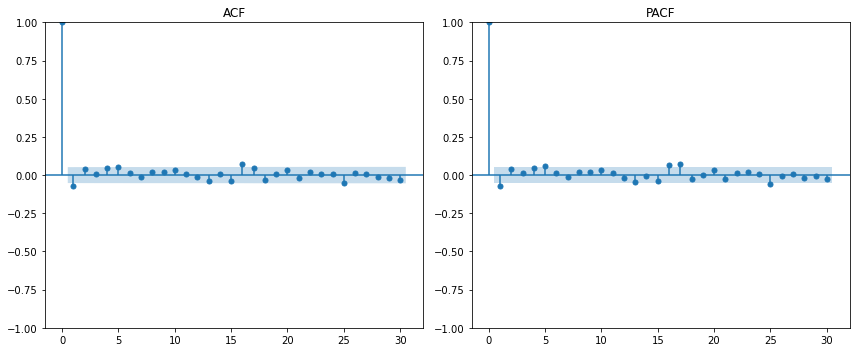

In [349]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df_all['Close Price_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("ACF")

plt.subplot(1, 2, 2)
plot_pacf(df_all['Close Price_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("PACF")
plt.tight_layout()
plt.show()

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



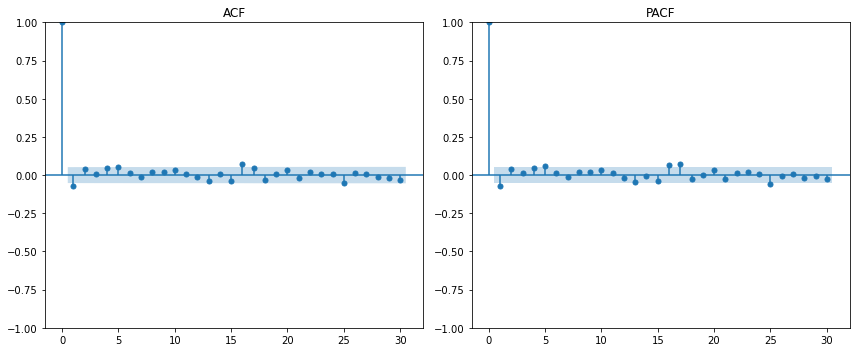

In [350]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(df_all['Close Price_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("ACF")

plt.subplot(1, 2, 2)
plot_pacf(df_all['Close Price_diff'].dropna(), lags=30, ax=plt.gca())
plt.title("PACF")
plt.tight_layout()
plt.show()

dari sini hasilnya 1 untuk p & q karena tajam di lag ke 1. tp mau coba pake grid search AIC

In [351]:
df_all

,Close Price,Inflasi,BI Rate,Cadangan Devisa,Close Price_diff,BI Rate_diff
Date,,,,,,
2020-01-01,15559.5,2.68,5.0,131704000000,NaN,NaN
2020-01-02,15511.2,2.68,5.0,131704000000,-48.3,0.0
2020-01-03,15536.1,2.68,5.0,131704000000,24.9,0.0
2020-01-06,15603.0,2.68,5.0,131704000000,66.9,0.0
2020-01-07,15467.8,2.68,5.0,131704000000,-135.2,0.0
...,...,...,...,...,...,...
2025-05-26,18494.1,1.60,5.5,152488000000,62.9,0.0
2025-05-27,18435.1,1.60,5.5,152488000000,-59.0,0.0
2025-05-28,18396.3,1.60,5.5,152488000000,-38.8,0.0


## Modelling + experiment P,Q,D

In [378]:
window_size = 25
horizon = 1

X = []
y = []

data = df_all[['Close Price', 'Inflasi', 'BI Rate', 'Cadangan Devisa']]

for i in range(len(data) - window_size - horizon + 1):
    window = data.iloc[i : i + window_size]
    target = data.iloc[i + window_size : i + window_size + horizon]['Close Price'].values
    X.append(window.values)
    y.append(target)

X = np.array(X)  
y = np.array(y) 

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [353]:
X_train.shape

(1109, 22, 4)

In [176]:
X_test.shape

(276, 30, 4)

In [177]:
y_train.shape

(1103, 5)

In [379]:
# Walk-forward ARIMAX 
#import statsmodels.api as sm 

history_X = list(X_train)
history_y = list(y_train)

predictions = []

for t in range(len(X_test)):
    current_window = X_test[t]
    endog = current_window[:, 0]        
    exog = current_window[:, 1:]   

    # Use last exog row and repeat for future horizon
    future_exog = np.repeat([exog[-1]], horizon, axis=0)

    try:
        model = sm.tsa.ARIMA(endog=endog, exog=exog, order=(1, 1, 2)) # awalnya: 5, 1, 0
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=horizon, exog=future_exog)
        predictions.append(forecast)
      #  print(f'Predicted: {forecast}, Expected: {y_test[t]}')
    except Exception as e:
      #  print(f"Error at step {t}: {e}")
        predictions.append(np.full(horizon, np.nan))

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita

In [361]:
future_exog

array([[1.60000e+00, 5.50000e+00, 1.52488e+11]])

In [380]:
# eval
#from sklearn.metrics import mean_absolute_percentage_error

y_true_valid = []
y_pred_valid = []

for true, pred in zip(y_test, predictions):
    if not np.isnan(pred).any():
        y_true_valid.append(true)
        y_pred_valid.append(pred)

y_true_valid = np.array(y_true_valid)
y_pred_valid = np.array(y_pred_valid)

y_true_flat = y_true_valid.flatten()
y_pred_flat = y_pred_valid.flatten()

mae = mean_absolute_error(y_true_flat, y_pred_flat)
rmse = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))
mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)


print(f"Final MAE: {mae:.3f}")
print(f"Final RMSE: {rmse:.3f}")
print(f"Final MAPEE: {mape:.5f}")

Final MAE: 77.228
Final RMSE: 104.947
Final MAPEE: 0.00441


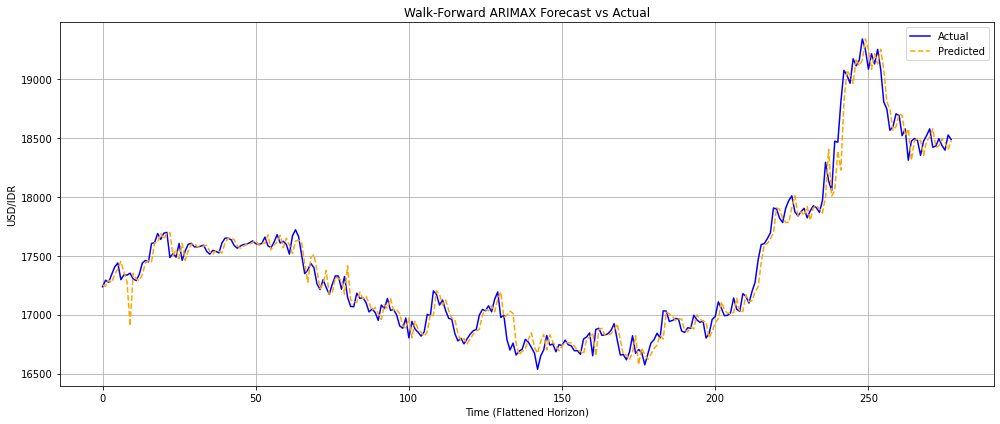

In [375]:
plt.figure(figsize=(14, 6))
plt.plot(y_true_flat, label='Actual', color='blue')
plt.plot(y_pred_flat, label='Predicted', color='orange', linestyle='--')
plt.title('Walk-Forward ARIMAX Forecast vs Actual')
plt.xlabel('Time (Flattened Horizon)')
plt.ylabel('USD/IDR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [376]:
forecast

array([18477.99172129])

In [377]:
df_all['Close Price']

Date
2020-01-01    15559.5
2020-01-02    15511.2
2020-01-03    15536.1
2020-01-06    15603.0
2020-01-07    15467.8
               ...   
2025-05-26    18494.1
2025-05-27    18435.1
2025-05-28    18396.3
2025-05-29    18525.0
2025-05-30    18485.9
Name: Close Price, Length: 1413, dtype: float64

## 22 / 1 Horizon

In [87]:
window_size = 22
horizon = 1

X = []
y = []

data = df_all[['Close Price', 'Inflasi', 'BI Rate', 'Cadangan Devisa']]

for i in range(len(data) - window_size - horizon + 1):
    window = data.iloc[i : i + window_size]
    target = data.iloc[i + window_size : i + window_size + horizon]['Close Price'].values
    X.append(window.values)
    y.append(target)

X = np.array(X)  
y = np.array(y) 

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [88]:
X_train.shape

(1112, 22, 4)

In [89]:
X_test.shape

(279, 22, 4)

In [90]:
y_train.shape

(1112, 1)

In [91]:
y_test.shape

(279, 1)

In [92]:
history_X = list(X_train)
history_y = list(y_train)

predictions = []

for t in range(len(X_test)):
    current_window = X_test[t]
    endog = current_window[:, 0]        
    exog = current_window[:, 1:]   

    # Use last exog row and repeat for future horizon
    future_exog = np.repeat([exog[-1]], horizon, axis=0)

    try:
        model = sm.tsa.ARIMA(endog=endog, exog=exog, order=(1, 1, 1)) # awalnya: 5, 1, 0
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=horizon, exog=future_exog)
        predictions.append(forecast)
       # print(f'Predicted: {forecast}, Expected: {y_test[t]}')
    except Exception as e:
       # print(f"Error at step {t}: {e}")
        predictions.append(np.full(horizon, np.nan))

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita

In [93]:
# eval
y_true_valid = []
y_pred_valid = []

for true, pred in zip(y_test, predictions):
    if not np.isnan(pred).any():
        y_true_valid.append(true)
        y_pred_valid.append(pred)

y_true_valid = np.array(y_true_valid)
y_pred_valid = np.array(y_pred_valid)

y_true_flat = y_true_valid.flatten()
y_pred_flat = y_pred_valid.flatten()

mae = mean_absolute_error(y_true_flat, y_pred_flat)
rmse = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))
mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)

print(f"Final MAE: {mae:.3f}")
print(f"Final RMSE: {rmse:.3f}")
print(f"Final MAPEE: {mape:.3f}")

Final MAE: 78.293
Final RMSE: 107.906
Final MAPEE: 0.004


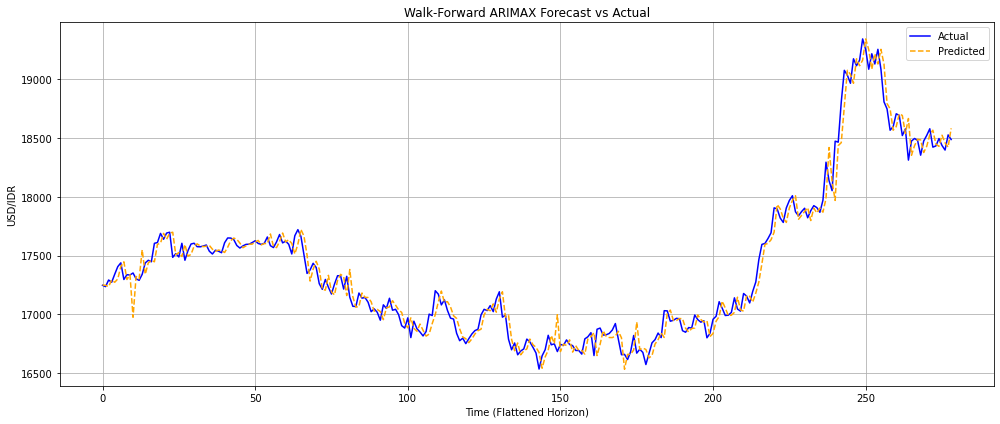

In [94]:
plt.figure(figsize=(14, 6))
plt.plot(y_true_flat, label='Actual', color='blue')
plt.plot(y_pred_flat, label='Predicted', color='orange', linestyle='--')
plt.title('Walk-Forward ARIMAX Forecast vs Actual')
plt.xlabel('Time (Flattened Horizon)')
plt.ylabel('USD/IDR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 25/1 dan 30/1

In [95]:
window_size = 30
horizon = 1

X = []
y = []

data = df_all[['Close Price', 'Inflasi', 'BI Rate', 'Cadangan Devisa']]

for i in range(len(data) - window_size - horizon + 1):
    window = data.iloc[i : i + window_size]
    target = data.iloc[i + window_size : i + window_size + horizon]['Close Price'].values
    X.append(window.values)
    y.append(target)

X = np.array(X)  
y = np.array(y) 

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [96]:
X_train.shape

(1106, 30, 4)

In [97]:
import statsmodels.api as sm 

history_X = list(X_train)
history_y = list(y_train)

predictions = []

for t in range(len(X_test)):
    current_window = X_test[t]
    endog = current_window[:, 0]        
    exog = current_window[:, 1:]   

    # Use last exog row and repeat for future horizon
    future_exog = np.repeat([exog[-1]], horizon, axis=0)

    try:
        model = sm.tsa.ARIMA(endog=endog, exog=exog, order=(1, 1, 1)) # awalnya: 5, 1, 0
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=horizon, exog=future_exog)
        predictions.append(forecast)
      #  print(f'Predicted: {forecast}, Expected: {y_test[t]}')
    except Exception as e:
      #  print(f"Error at step {t}: {e}")
        predictions.append(np.full(horizon, np.nan))

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/s

In [98]:
y_true_valid = []
y_pred_valid = []
from sklearn.metrics import mean_absolute_percentage_error

for true, pred in zip(y_test, predictions):
    if not np.isnan(pred).any():
        y_true_valid.append(true)
        y_pred_valid.append(pred)

y_true_valid = np.array(y_true_valid)
y_pred_valid = np.array(y_pred_valid)

y_true_flat = y_true_valid.flatten()
y_pred_flat = y_pred_valid.flatten()

mae = mean_absolute_error(y_true_flat, y_pred_flat)
rmse = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))

print(f"Final MAE: {mae:.3f}")
print(f"Final RMSE: {rmse:.3f}")
mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)
print(f"Final MAPE: {mape:.3f}")

Final MAE: 76.447
Final RMSE: 106.453
Final MAPE: 0.004


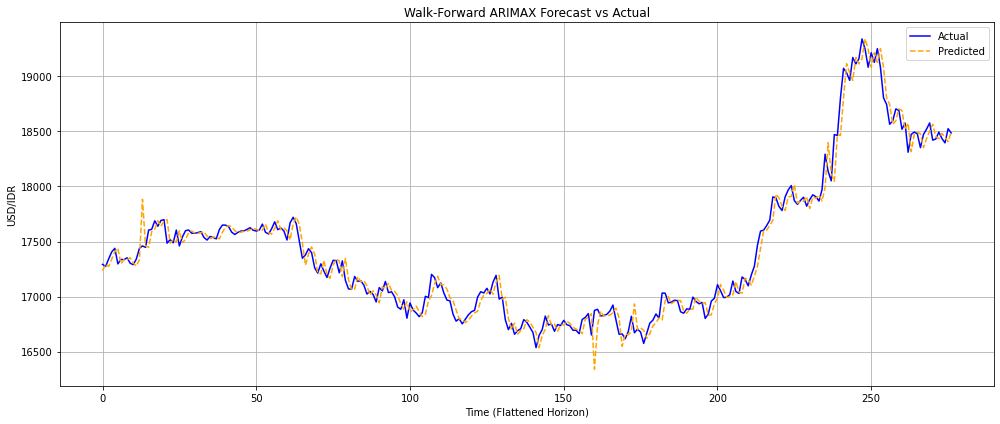

In [99]:
plt.figure(figsize=(14, 6))
plt.plot(y_true_flat, label='Actual', color='blue')
plt.plot(y_pred_flat, label='Predicted', color='orange', linestyle='--')
plt.title('Walk-Forward ARIMAX Forecast vs Actual')
plt.xlabel('Time (Flattened Horizon)')
plt.ylabel('USD/IDR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 25/5 dan 30/5

In [122]:
window_size = 30
horizon = 5

X = []
y = []

data = df_all[['Close Price', 'Inflasi', 'BI Rate', 'Cadangan Devisa']]

for i in range(len(data) - window_size - horizon + 1):
    window = data.iloc[i : i + window_size]
    target = data.iloc[i + window_size : i + window_size + horizon]['Close Price'].values
    X.append(window.values)
    y.append(target)

X = np.array(X)  
y = np.array(y) 

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [123]:
y_train.shape

(1103, 5)

In [124]:
history_X = list(X_train)
history_y = list(y_train)

predictions = []

for t in range(len(X_test)):
    current_window = X_test[t]
    endog = current_window[:, 0]        
    exog = current_window[:, 1:]   

    # Use last exog row and repeat for future horizon
    future_exog = np.repeat([exog[-1]], horizon, axis=0)

    try:
        model = sm.tsa.ARIMA(endog=endog, exog=exog, order=(1, 1, 1)) 
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=horizon, exog=future_exog)
        predictions.append(forecast)
      #  print(f'Predicted: {forecast}, Expected: {y_test[t]}')
    except Exception as e:
      #  print(f"Error at step {t}: {e}")
        predictions.append(np.full(horizon, np.nan))

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/s

In [125]:
exog

array([[1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.95000e+00, 5.75000e+00, 1.52467e+11],
       [1.60000e+00, 5.50000e+00, 1.52488e+11],
       [1.60000e+00, 5.50000e+00, 1.52488e+11],
       [1.60000e+00, 5.50000e+00, 1.52488e+11],
       [1.60000e+00, 5.50000e+00, 1.52488e+11],
       [1.60000e+00, 5.50000e+00, 1.52488e+11],
       [1.60000e+00, 5.50000e+00, 1.52488e+11],
       [1.60000e+00, 5.50000e+00, 1.52488e+11],
       [1.60000e+00, 5.50000e+00, 1.5248

In [126]:
y_true_valid = []
y_pred_valid = []

for true, pred in zip(y_test, predictions):
    if not np.isnan(pred).any():
        y_true_valid.append(true)
        y_pred_valid.append(pred)

y_true_valid = np.array(y_true_valid)
y_pred_valid = np.array(y_pred_valid)

y_true_flat = y_true_valid.flatten()
y_pred_flat = y_pred_valid.flatten()

mae = mean_absolute_error(y_true_flat, y_pred_flat)
rmse = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))

print(f"Final MAE: {mae:.3f}")
print(f"Final RMSE: {rmse:.3f}")
mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)
print(f"Final MAPE: {mape:.3f}")

Final MAE: 114.985
Final RMSE: 165.761
Final MAPE: 0.007


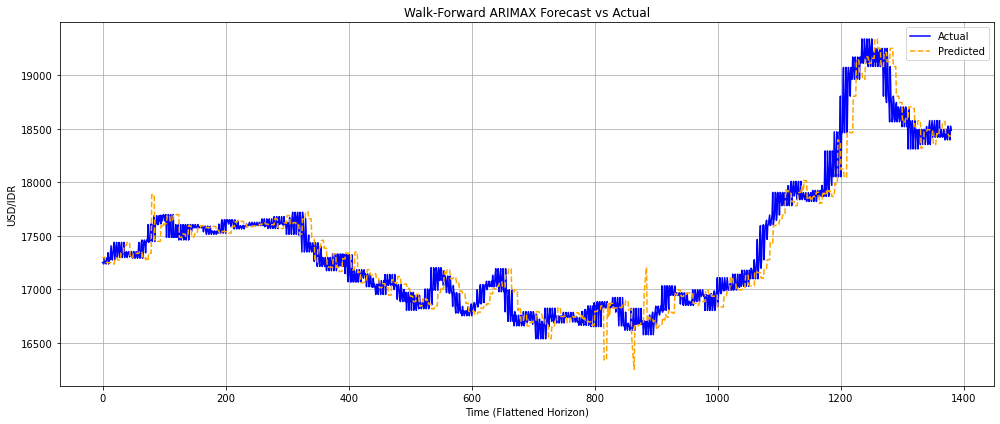

In [127]:
plt.figure(figsize=(14, 6))
plt.plot(y_true_flat, label='Actual', color='blue')
plt.plot(y_pred_flat, label='Predicted', color='orange', linestyle='--')
plt.title('Walk-Forward ARIMAX Forecast vs Actual')
plt.xlabel('Time (Flattened Horizon)')
plt.ylabel('USD/IDR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## save best model tanpa normalisasi (30/5 & 30/1)

In [128]:
# save best model
import pickle as pkl

filename = 'eur_arimax_5_2.pkl'
pkl.dump(model_fit, open(filename, 'wb'))

In [129]:
mean_actual = np.mean(y_true_flat)
accuracy_mae = 100 * (1 - (mae / mean_actual))
accuracy_rmse = 100 * (1 - (rmse / mean_actual))

print(f"Accuracy based on MAE: {accuracy_mae:.2f}%")
print(f"Accuracy based on RMSE: {accuracy_rmse:.2f}%")

Accuracy based on MAE: 99.34%
Accuracy based on RMSE: 99.05%


# NORMALISASI DATANYA

In [267]:
from sklearn.preprocessing import MinMaxScaler

window_size = 30
horizon = 1

# train test
split_idx = int(len(df_all) * 0.8)
train_df = df_all.iloc[:split_idx][['Close Price', 'Inflasi', 'BI Rate','Cadangan Devisa']]
test_df  = df_all.iloc[split_idx:][['Close Price', 'Inflasi', 'BI Rate','Cadangan Devisa']]

# scaling in training set
scaler = MinMaxScaler(feature_range=(0,1))
train_scaled = scaler.fit_transform(train_df)
test_scaled  = scaler.transform(test_df)

train_scaled = pd.DataFrame(train_scaled, 
                            index=train_df.index, 
                            columns=train_df.columns)
test_scaled = pd.DataFrame(test_scaled, 
                           index=test_df.index, 
                           columns=test_df.columns)

data_scaled = pd.concat([train_scaled, test_scaled])

X, y = [], []

for i in range(len(data_scaled) - window_size - horizon + 1):
    window = data_scaled.iloc[i : i + window_size]
    target = data_scaled.iloc[i + window_size : i + window_size + horizon]['Close Price'].values
    X.append(window.values)
    y.append(target)

X = np.array(X)  
y = np.array(y) 

split_idx = int(len(X) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [268]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

history_X = list(X_train)
history_y = list(y_train)

predictions = []

for t in range(len(X_test)):
    current_window = X_test[t]

    endog = current_window[:, 0] 
    exog = current_window[:, 1:] 

    future_exog = np.repeat([exog[-1]], horizon, axis=0)

    try:
        model = sm.tsa.ARIMA(endog=endog, exog=exog, order=(1, 1, 1))
        model_fit = model.fit()

        forecast = model_fit.forecast(steps=horizon, exog=future_exog)
        predictions.append(forecast)

     #   print(f'Predicted: {forecast}, Expected: {y_test[t]}')

    except Exception as e:
     #   print(f"Error at step {t}: {e}")
        predictions.append(np.full(horizon, np.nan))

y_true_valid, y_pred_valid = [], []

for true, pred in zip(y_test, predictions):
    if not np.isnan(pred).any():
        y_true_valid.append(true)
        y_pred_valid.append(pred)

y_true_valid = np.array(y_true_valid)
y_pred_valid = np.array(y_pred_valid)

y_true_flat = y_true_valid.flatten()
y_pred_flat = y_pred_valid.flatten()

mae = mean_absolute_error(y_true_flat, y_pred_flat)
rmse = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))
mape = mean_absolute_percentage_error(y_true_flat, y_pred_flat)

print(f"Final MAE: {mae:.3f}")
print(f"Final RMSE: {rmse:.3f}")
print(f"Final MAPE: {mape:.3f}")

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/Users/patriciapepita/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/Users/patriciapepita

Final MAE: 0.021
Final RMSE: 0.029
Final MAPE: 0.026


Final MAE: 75.733
Final RMSE: 101.545
Final MAPE: 0.004


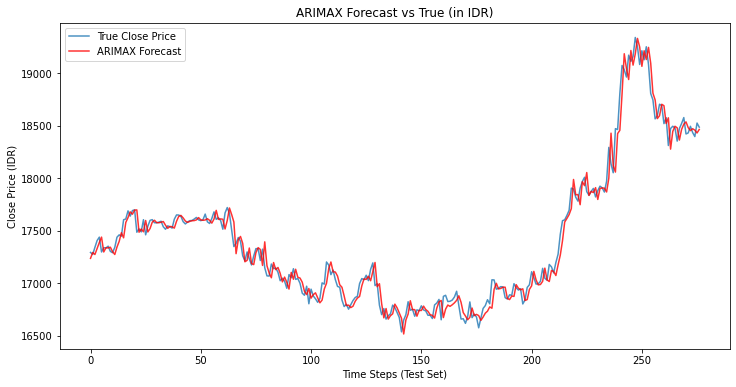

In [269]:
# denormalisasi
def inverse_close(scaled_array):
    dummy = np.zeros((len(scaled_array), 4))   # 3 features
    dummy[:, 0] = scaled_array                 # put close price in first col
    inv = scaler.inverse_transform(dummy)
    return inv[:, 0]

y_true_flat = y_true_valid.flatten()
y_pred_flat = y_pred_valid.flatten()

y_true_inv = inverse_close(y_true_flat)
y_pred_inv = inverse_close(y_pred_flat)

mae = mean_absolute_error(y_true_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
mape = mean_absolute_percentage_error(y_true_inv, y_pred_inv)

print(f"Final MAE: {mae:.3f}")
print(f"Final RMSE: {rmse:.3f}")
print(f"Final MAPE: {mape:.3f}")

plt.figure(figsize=(12,6))
plt.plot(y_true_inv, label="True Close Price", alpha=0.8)
plt.plot(y_pred_inv, label="ARIMAX Forecast", alpha=0.8, color="red")
plt.legend()
plt.title("ARIMAX Forecast vs True (in IDR)")
plt.xlabel("Time Steps (Test Set)")
plt.ylabel("Close Price (IDR)")
plt.show()


### save best model ->

22/5 with normalisasi

30/1 with normalisasi


In [270]:
# save best model
import pickle as pkl

filename = 'eur_arimax_1.pkl'
pkl.dump(model_fit, open(filename, 'wb'))

## AUTO ARIMA

(FIND BEST P AND D based on aic/bic)

In [ ]:
from pmdarima import auto_arima 

data = df_all[['Close Price', 'Inflasi', 'BI Rate']]

train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]
y_train, y_test = train['Close Price'], test['Close Price']
exog_train, exog_test = train[['Inflasi', 'BI Rate']], test[['Inflasi', 'BI Rate']]

model = auto_arima(
    y=y_train,
    exogenous=exog_train,
    start_p=0, start_q=0,
    max_p=5, max_q=5,  
    d=None,             
    seasonal=False,    
    stepwise=True,      
    trace=True,      
    error_action='ignore',
    suppress_warnings=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13454.054, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13450.547, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13451.117, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13452.374, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13449.029, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=13450.990, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13450.763, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13449.371, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13452.779, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=13447.360, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=13448.921, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=13449.326, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=13449.103, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13447.691, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0

In [ ]:
forecast = model.predict(n_periods=len(y_test), exogenous=exog_test)

mae = mean_absolute_error(y_test, forecast)
rmse = np.sqrt(mean_squared_error(y_test, forecast))
mape = mean_absolute_percentage_error(y_test, forecast)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.3f}")

MAE: 499.614
RMSE: 652.311
MAPE: 0.028


In [ ]:
''' 
plt.figure(figsize=(12,6))
plt.plot(y_train.index, y_train, label="Train")
plt.plot(y_test.index, y_test, label="Test", color='blue')
plt.plot(y_test.index, forecast, label="Forecast", color='red')
plt.title("ARIMAX Forecast with auto_arima")
plt.xlabel("Date")
plt.ylabel("Close Price (IDR/USD)")
plt.legend()
plt.show()
'''

' \nplt.figure(figsize=(12,6))\nplt.plot(y_train.index, y_train, label="Train")\nplt.plot(y_test.index, y_test, label="Test", color=\'blue\')\nplt.plot(y_test.index, forecast, label="Forecast", color=\'red\')\nplt.title("ARIMAX Forecast with auto_arima")\nplt.xlabel("Date")\nplt.ylabel("Close Price (IDR/USD)")\nplt.legend()\nplt.show()\n'